<h1>Pyber Ride Sharing</h1>

Assignment:  Matplotlib Homework<br/>
Organization:  USC Viterbi Analytics Bootcamp, 1/30<br/>
Author:  Patrick Humphries<br/>
Date:  March 7, 2018

<h2>Analysis</h2>
<ul>
<li>Rural drivers make up only 3.1% of the drivers but they bring in 6.6% of the revenue.  Hence rural drivers earn twice as much as urban drivers.</li>
<li>Rides, drivers, and revenue is dominated by urban city types.</li>
<li>Urban fares are low but the frequency of rides is high, resulting in high revenue</li>
</ul>

In [26]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

In [27]:
# Read City Data
city_data_csv = "raw_data/city_data.csv"
df_city = pd.read_csv(city_data_csv)
df_city.head() # 126 x 3

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [28]:
# Rename type to city_type to avoid confusion with a keyword.
df_city = df_city.rename(columns={"type":"city_type"})
df_city.head()

,city,driver_count,city_type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [29]:
# Read Ride Data
ride_data_csv = "raw_data/ride_data.csv"
df_ride = pd.read_csv(ride_data_csv)
df_ride.head() # 2375 x 4

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [30]:
# Aggregate Fares and Rides.
df_ride_agg = pd.DataFrame(df_ride.groupby('city').agg({'fare': ['mean', 'count']}))

# Remove the high-level label as a result of the aggregation.
df_ride_agg = df_ride_agg.get('fare')

# Move the city index values into a column.
df_ride_agg = df_ride_agg.reset_index()

# Convert the mean fare to an integer.
df_ride_agg['mean'] = [int(x) for x in df_ride_agg['mean']]

# Rename the aggregation headings to the corresponding attributes.
df_ride_agg = df_ride_agg.rename(columns={"mean":"fare", "count":"rides"})

df_ride_agg.head()

,city,fare,rides
0,Alvarezhaven,23,31
1,Alyssaberg,20,26
2,Anitamouth,37,9
3,Antoniomouth,23,22
4,Aprilchester,21,19


In [31]:
# Merge city and ride data.
df_merged = pd.merge(df_city, df_ride_agg)
df_merged.head()

,city,driver_count,city_type,fare,rides
0,Kelseyland,63,Urban,21,28
1,Nguyenbury,8,Urban,25,26
2,East Douglas,12,Urban,26,22
3,West Dawnfurt,34,Urban,22,29
4,Rodriguezburgh,52,Urban,21,23


In [32]:
# Calculate revenue for pie charts.
df_merged['revenue'] = df_merged['fare'] * df_merged['rides']
df_merged.head()

,city,driver_count,city_type,fare,rides,revenue
0,Kelseyland,63,Urban,21,28,588
1,Nguyenbury,8,Urban,25,26,650
2,East Douglas,12,Urban,26,22,572
3,West Dawnfurt,34,Urban,22,29,638
4,Rodriguezburgh,52,Urban,21,23,483


In [33]:
# Define a function that translates city type into color.
def select_facecolor(city_type):
    if city_type == "Urban":
        return "lightcoral"
    if city_type == "Suburban":
        return "lightskyblue"
    return "gold"

In [34]:
# Add color to the merged data based on city type.
df_merged['facecolor'] = [select_facecolor(x) for x in df_merged['city_type']]
df_merged.head()

,city,driver_count,city_type,fare,rides,revenue,facecolor
0,Kelseyland,63,Urban,21,28,588,lightcoral
1,Nguyenbury,8,Urban,25,26,650,lightcoral
2,East Douglas,12,Urban,26,22,572,lightcoral
3,West Dawnfurt,34,Urban,22,29,638,lightcoral
4,Rodriguezburgh,52,Urban,21,23,483,lightcoral


<h2>Bubble Plot of Ride Sharing Data</h2>

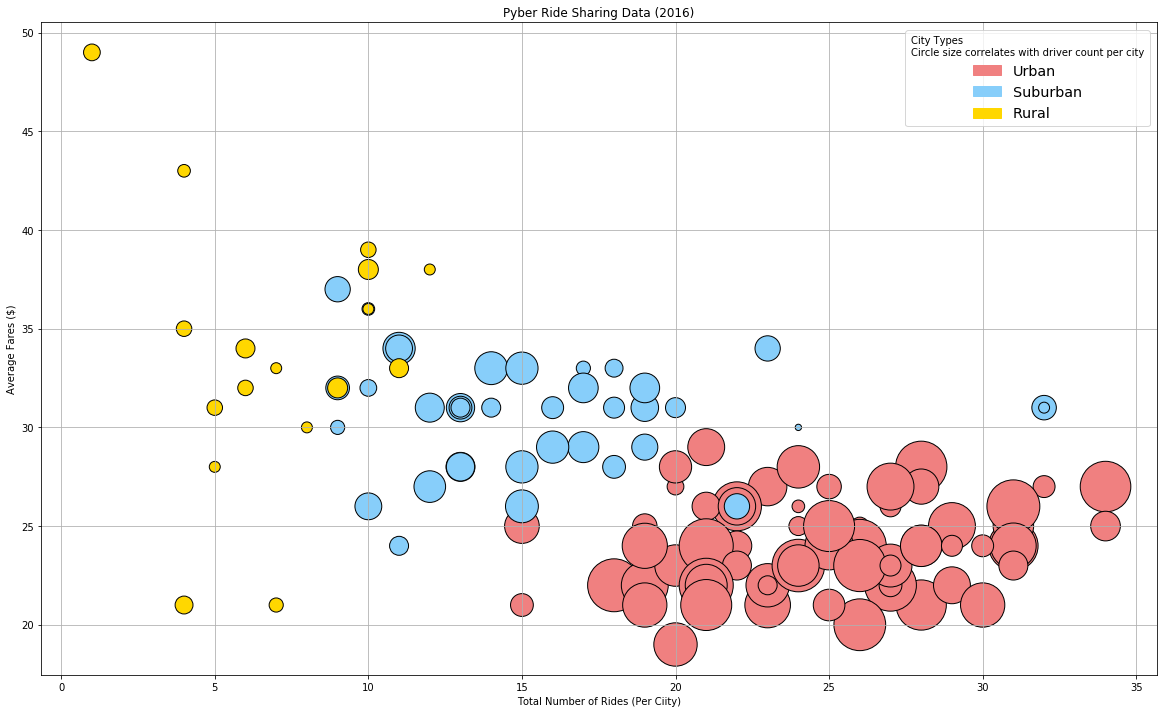

In [35]:
# Plot the merged dataframe.

# Lists are used for x axis, y axis, bubble size, and bubble color.
plt.figure(figsize=(20,12))

# Get number of rides per city for the horizontal axis.
list_rides = list(df_merged.loc[:,'rides'])
    
# Get average fares per city for the verticle axis.
list_fares = list(df_merged.loc[:,'fare'])
    
# Calculate revenue, to be used in pie chars.
list_revenue = list(df_merged.loc[:,'revenue'])

# Get driver count for bubble size.
list_driver_count = list(df_merged.loc[:,'driver_count'])

# Scale up the driver count for appropiate size on bubble chart.
list_driver_count = [x * 40 for x in list_driver_count]

# Get facecolor for bubble color representing city type.
list_facecolors = list(df_merged.loc[:,'facecolor'])

# Plot the four lists.
plt.scatter(list_rides, list_fares, list_driver_count, marker="o", facecolors=list_facecolors, edgecolors="black")

# Add labels and grid.
plt.xlabel('Total Number of Rides (Per Ciity)')
plt.ylabel('Average Fares ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.grid()

# Add a custom legend.
urban_patch = mpatches.Patch(color='lightcoral', label='Urban')
suburban_patch = mpatches.Patch(color='lightskyblue', label='Suburban')
rural_patch = mpatches.Patch(color='gold', label='Rural')
plt.legend(title="City Types\nCircle size correlates with driver count per city", fontsize='x-large', handles=[urban_patch, suburban_patch, rural_patch])

# Show the bubble chart.
plt.show()

<h2>Total Fares by City Type</h2>

In [36]:
# Determining that city type and revenue are needed for revenue pie chart.
df_merged.head()

,city,driver_count,city_type,fare,rides,revenue,facecolor
0,Kelseyland,63,Urban,21,28,588,lightcoral
1,Nguyenbury,8,Urban,25,26,650,lightcoral
2,East Douglas,12,Urban,26,22,572,lightcoral
3,West Dawnfurt,34,Urban,22,29,638,lightcoral
4,Rodriguezburgh,52,Urban,21,23,483,lightcoral


In [37]:
# Aggregate revenue by city type.
df_revenue = pd.DataFrame(df_merged.groupby('city_type').agg({'revenue': ['sum']}))

# Remove high-level labels as result of the aggregation.
df_revenue = df_revenue['revenue']

# Rename the aggregated column to the corresponding attribute.
df_revenue = df_revenue.rename(columns={"sum":"revenue"})

# Move city type index to a column.
df_revenue = df_revenue.reset_index()

# Add colors that correspond to the city type.
df_revenue['facecolor'] = [select_facecolor(x) for x in df_revenue['city_type']]

# Show revenue parameters.
df_revenue

,city_type,revenue,facecolor
0,Rural,4195,gold
1,Suburban,19990,lightskyblue
2,Urban,39285,lightcoral


In [38]:
# Labels for the sections of our pie chart.
labels = list(df_revenue['city_type'])

# Values of each section of the pie chart.
sizes = list(df_revenue['revenue'])

# Colors of each section of the pie chart.
colors = list(df_revenue['facecolor'])

# Separate slices.
explode = (0.1, 0.1, 0.1)

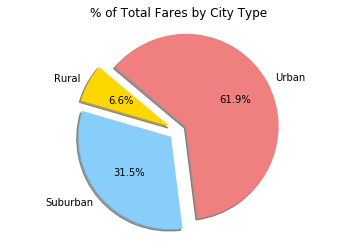

In [39]:
# Creates the pie chart based upon the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Prop up the pie chart.
plt.axis("equal")

# Add a title to the pie chart.
plt.title('% of Total Fares by City Type')

# Show the pie chart.
plt.show()

<h2>Total Rides by City Type</h2>

In [40]:
# Aggregate rides by city type.
df_rides = pd.DataFrame(df_merged.groupby('city_type').agg({'rides': ['sum']}))

# Remove high-level label as result of the aggregation.
df_rides = df_rides['rides']

# Rename the aggregation labels to the corresponding attributes.
df_rides = df_rides.rename(columns={"sum":"rides"})

# Move city type to a column.
df_rides = df_rides.reset_index()

# A colors that correspond to the city type.
df_rides['facecolor'] = [select_facecolor(x) for x in df_rides['city_type']]

# Show rides parameters.
df_rides

,city_type,rides,facecolor
0,Rural,125,gold
1,Suburban,657,lightskyblue
2,Urban,1625,lightcoral


In [41]:
# Labels for the sections of our pie chart.
labels = list(df_rides['city_type'])

# Values of each section of the pie chart.
sizes = list(df_rides['rides'])

# Colors of each section of the pie chart.
colors = list(df_rides['facecolor'])

# Separate slices.
explode = (0.1, 0.1, 0.1)

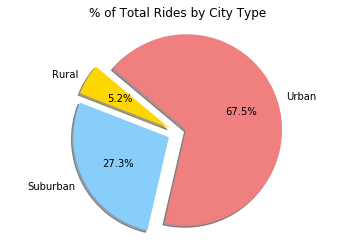

In [42]:
# Creates the pie chart based upon the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Prop up the pie chart.
plt.axis("equal")

# Add a title to the pie chart.
plt.title('% of Total Rides by City Type')

# Show the pie chart.
plt.show()

<h2>Total Drivers by City Type</h2>

In [43]:
# Aggregate drivers by city type.
df_drivers = pd.DataFrame(df_merged.groupby('city_type').agg({'driver_count': ['sum']}))

# Remove the high-level label as result of the aggregation.
df_drivers = df_drivers['driver_count']

# Rename the aggregation label to the corresponding attribute.
df_drivers = df_drivers.rename(columns={"sum":"drivers"})

# Move city type to a column.
df_drivers = df_drivers.reset_index()

# Add colors that correspond to the city type.
df_drivers['facecolor'] = [select_facecolor(x) for x in df_drivers['city_type']]

# Show diver parameters.
df_drivers

,city_type,drivers,facecolor
0,Rural,104,gold
1,Suburban,638,lightskyblue
2,Urban,2607,lightcoral


In [44]:
# Labels for the sections of our pie chart.
labels = list(df_drivers['city_type'])

# Values of each section of the pie chart.
sizes = list(df_drivers['drivers'])

# Colors of each section of the pie chart.
colors = list(df_drivers['facecolor'])

# Separate slices.
explode = (0.1, 0.1, 0.1)

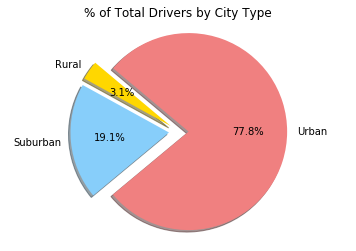

In [45]:
# Creates the pie chart based upon the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Prop up the pie chart.
plt.axis("equal")

# Add a title to the pie chart.
plt.title('% of Total Drivers by City Type')

# Show the pie chart.
plt.show()